# Animate Lists

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция, которую минимизируем, минимум в точке (0, 0)
def f(x, y):
    return 1.3 * (x-1 - y) ** 3 + 0.7 * (x + y) ** 2

# Отрисовка траектории и линий уровня функции
def plot_trajectory(func, traj, limit_point=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    if limit_point:
        ax.plot([limit_point[0]], [limit_point[1]], 'o', color='green')
    #Level contours
    delta = 0.025
    x = np.arange(-2, 2, delta)
    y = np.arange(-2, 2, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = func(X[i][j], Y[i][j])
    CS = ax.contour(X, Y, Z, [0.5, 1.5, 3], colors=['blue', 'purple', 'red'])
    ax.plot([u[0] for u in traj], [u[1] for u in traj], color='black')
    ax.plot([u[0] for u in traj], [u[1] for u in traj], 'o', color='black')
    
    plt.close(fig)
    return fig

x, y = (1.0, 1.0)
num_iters = 100
trajectory = [(x, y)]
plots = []
# Итерируемся и сохраняем текущий путь на каждом шаге
for i in range(num_iters):
    angle = 2 * np.pi * np.random.rand(1)
    dx, dy = (np.cos(angle) / 2 / (i + 1) ** 0.5, np.sin(angle) / 2 / (i + 1) ** 0.5)
    trajectory.append((x + dx, y + dy))
    plots.append(plot_trajectory(f, trajectory, limit_point=(0, 0)))
    if f(x, y) > f(x + dx, y + dy):
        x = x + dx
        y = y + dy
    else:
        trajectory = trajectory[:-1]

animate_list(plots, play=True, interval=300);

NameError: name 'animate_list' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

@interact(f=(1, 5, 0.001), phase=(0, 3.14, 0.1))
def plot_f(f, phase):
    x = np.linspace(0, 10, 100)
    y = np.sin(f * x + phase)
    plt.plot(x, y, 'r')
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='f', max=5.0, min=1.0, step=0.001), FloatSlider(value…

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display


def step_slice(lst, step):
    return lst[step]


def animate_list(lst, play=False, interval=200):
    slider = widgets.IntSlider(min=0, max=len(lst) - 1, step=1, value=0)
    if play:
        play_widjet = widgets.Play(interval=interval)
        widgets.jslink((play_widjet, 'value'), (slider, 'value'))
        display(play_widjet)
        # slider = widgets.Box([play_widject, slider])
    return interact(step_slice,
                    lst=fixed(lst),
                    step=slider)

In [ ]:
a = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
animate_list(a, play=True, interval=200);

Play(value=0, interval=200)

interactive(children=(IntSlider(value=0, description='step', max=9), Output()), _dom_classes=('widget-interact…

Normal picture plt

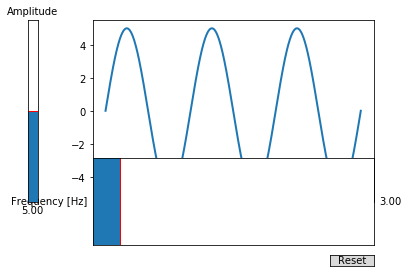

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.3])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()